# Simple Phantom Construction Demo

Import tomography/xdesign.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from xdesign import *

`polytope` failed to import `cvxopt.glpk`.
Will use `scipy.optimize.linprog`.


Create various `Features` with geometries. Assign attenuation `values` to each of the `Features`. Plot the `Phantom`.

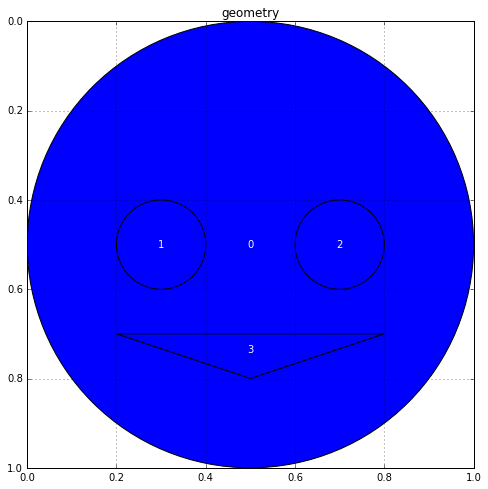

In [8]:
head = Feature(Circle(Point(0.5, 0.5), radius=0.5))
head.mass_atten = 1
eyeL = Feature(Circle(Point(0.3, 0.5), radius=0.1))
eyeL.mass_atten = 1
eyeR = Feature(Circle(Point(0.7, 0.5), radius=0.1))
eyeR.mass_atten = 1
mouth = Feature(Triangle(Point(0.2, 0.7), Point(0.5, 0.8), Point(0.8, 0.7)))
mouth.mass_atten = -1

Shepp = Phantom()
Shepp.append(head)
Shepp.append(eyeL)
Shepp.append(eyeR)
Shepp.append(mouth)

plot_phantom(Shepp, labels=True)
plt.title('geometry')
plt.show()


Simulate data acquisition for parallel beam around 180 degrees.

[##########] 100.00%


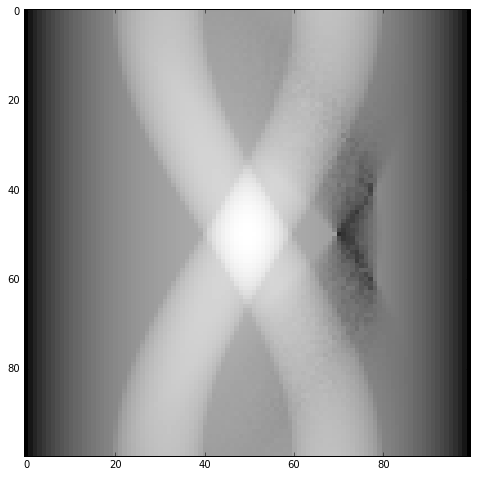

In [3]:
sx, sy = 100, 100
step = 1. / sy
prb = Probe(Point(step / 2., -10), Point(step / 2., 10), step)
theta = np.pi / sx
sino = np.zeros(sx * sy)
a = 0
for m in range(sx):
    for n in range(sy):
        update_progress((m*sy + n)/(sx*sy))
        sino[a] = prb.measure(Shepp)
        a += 1
        prb.translate(step)
    prb.translate(-1)
    prb.rotate(theta, Point(0.5, 0.5))
update_progress(1)

plt.figure(figsize=(8, 8))
plt.imshow(np.reshape(sino, (sx, sy)), cmap='gray', interpolation='nearest')
plt.show(block=True)

Create a discrete version of the phantom.

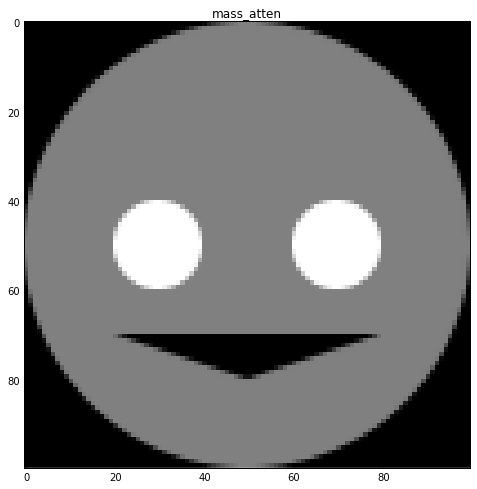

In [5]:
ref = discrete_phantom(Shepp, 100, prop='mass_atten')
plt.figure(figsize=(8, 8))
plt.imshow(ref, cmap='gray', interpolation='none')
plt.title('mass_atten')
plt.show(block=True)